In [41]:
import pandas as pd
import html5lib
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [42]:
url = "https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130101&end=20200320"
bitcoin_price = pd.read_html(url)
# The scrapped data is a list. Converting the list to a dataframe 
bitcoin_price = pd.concat(bitcoin_price)
bitcoin_price

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Close**,Date,High,Low,Market Cap,Open*,Volume
0,6185.07,"Mar 21, 2020",6378.14,5932.82,1.130682e+11,6206.52,4.249439e+10
1,6198.78,"Mar 20, 2020",6844.26,5865.78,1.133092e+11,6191.65,5.444298e+10
2,6191.19,"Mar 19, 2020",6329.74,5236.97,1.131621e+11,5245.42,5.100073e+10
3,5238.44,"Mar 18, 2020",5331.83,5069.34,9.574072e+10,5227.11,3.787880e+10
4,5225.63,"Mar 17, 2020",5371.35,4981.91,9.549994e+10,5002.58,3.862264e+10
...,...,...,...,...,...,...,...
2515,105.21,"May 02, 2013",125.60,92.28,1.168517e+09,116.38,0.000000e+00
2516,116.99,"May 01, 2013",139.89,107.72,1.298955e+09,139.00,0.000000e+00
2517,139.00,"Apr 30, 2013",146.93,134.05,1.542813e+09,144.00,0.000000e+00
2518,144.54,"Apr 29, 2013",147.49,134.00,1.603769e+09,134.44,0.000000e+00


In [43]:
bitcoin_price = bitcoin_price.assign(Date=pd.to_datetime(bitcoin_price['Date']))
bitcoin_price.loc[bitcoin_price['Volume']=='-', 'Volume']=0
bitcoin_price['Volume']=bitcoin_price['Volume'].astype('int64')
bitcoin_price.head()

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Close**,Date,High,Low,Market Cap,Open*,Volume
0,6185.07,2020-03-21,6378.14,5932.82,1.130682e+11,6206.52,42494390880
1,6198.78,2020-03-20,6844.26,5865.78,1.133092e+11,6191.65,54442976103
2,6191.19,2020-03-19,6329.74,5236.97,1.131621e+11,5245.42,51000731797
3,5238.44,2020-03-18,5331.83,5069.34,9.574072e+10,5227.11,37878801016
4,5225.63,2020-03-17,5371.35,4981.91,9.549994e+10,5002.58,38622642935


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


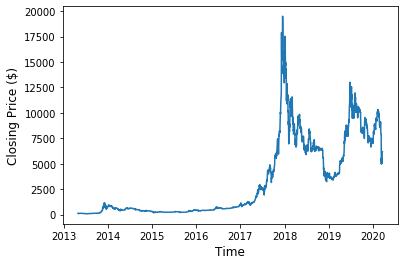

In [44]:
import datetime

fig, ax = plt.subplots()
ax.set_ylabel('Closing Price ($)', fontsize=12)
ax.set_xlabel('Time', fontsize=12)
ax.plot(bitcoin_price['Date'], bitcoin_price['Close**'])
plt.show()

In [45]:
bitcoin_price_short = bitcoin_price[['Date', 'Close**']]
bitcoin_price_short.set_index('Date')

bitcoin_price_short.head()


,Date,Close**
0,2020-03-21,6185.07
1,2020-03-20,6198.78
2,2020-03-19,6191.19
3,2020-03-18,5238.44
4,2020-03-17,5225.63


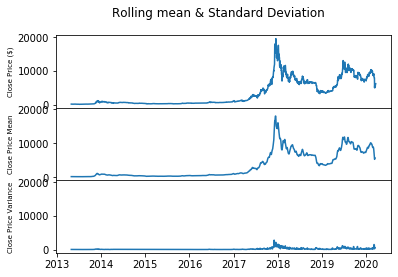

In [46]:
def plot_ma_std(timeseries, index, column, interval):
    rolmean = timeseries[column].rolling(window=interval).mean()
    rolstd = timeseries[column].rolling(interval).std()
    
    fig, axs = plt.subplots(3, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
    fig.suptitle('Rolling mean & Standard Deviation')
    axs[0].set_ylabel('Close Price ($)', fontsize=7)
    axs[0].set_xlabel('Time', fontsize=12)
    axs[0].plot(timeseries[index], timeseries[column])
    axs[1].set_ylabel('Close Price Mean', fontsize=7)
    axs[1].plot(timeseries[index], rolmean)
    axs[2].set_ylabel('Close Price Variance', fontsize=7)
    axs[2].plot(timeseries[index], rolstd)

    
#     orig = plt.plot(timeseries[column], color='blue', label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label="Rolling Std")
#     plt.legend(loc='best')
#     plt.title('Rolling mean & Standard Deviation')
    plt.show(block=False)
    
plot_ma_std(bitcoin_price_short, 'Date', 'Close**', 7)
    

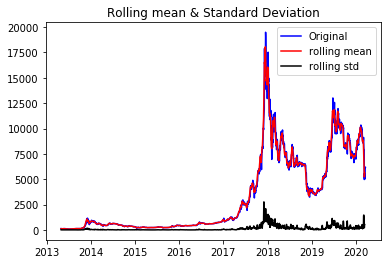

In [47]:
def plot_mean_std_in_one_chart(timeseries, index='Date', column='Close**', interval=7):
    rolmean = timeseries[column].rolling(window=interval).mean()
    rolstd = timeseries[column].rolling(interval).std()
    
    orig = plt.plot(timeseries[index], timeseries[column], color='blue', label="Original")
    mean = plt.plot(timeseries[index], rolmean, color='red', label='rolling mean')
    std = plt.plot(timeseries[index], rolstd, color='black', label='rolling std')
    
    plt.legend(loc='best')
    plt.title('Rolling mean & Standard Deviation')
    plt.show(block=False)
    
plot_mean_std_in_one_chart(bitcoin_price_short)

In [48]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print('Results of Dickey-Fuller Test: ')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Oberservations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [49]:
adf_test(bitcoin_price_short['Close**'])

Results of Dickey-Fuller Test: 
Test Statistic                     -2.112383
p-value                             0.239565
#Lags Used                         27.000000
Number of Oberservations Used    2492.000000
Critical Value (1%)                -3.432977
Critical Value (5%)                -2.862701
Critical Value (10%)               -2.567388
dtype: float64


In [50]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
    for key, value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)


In [51]:
kpss_test(bitcoin_price_short['Close**'])

Results of KPSS Test:
Test Statistic            6.105502
p-value                   0.010000
Lags Used                27.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [52]:
def test_stationarity(timeseries, adfuller_key):
    moving_avg = timeseries.rolling(window=12).mean()
    moving_std = timeseries.rolling(window=12).std()
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
    std = plt.plot(moving_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dicky Fuller Test:')
    dftest = adfuller(timeseries[adfuller_key], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [53]:
# TRANSFER THE NON-STATIONARY DATA TO STATIONARY DATA

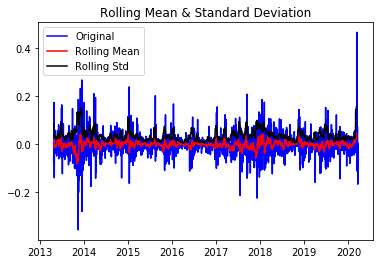

Results of Dicky Fuller Test:
Test Statistic                -9.369292e+00
p-value                        7.452361e-16
#Lags Used                     2.200000e+01
Number of Observations Used    2.496000e+03
Critical Value (1%)           -3.432973e+00
Critical Value (5%)           -2.862699e+00
Critical Value (10%)          -2.567387e+00
dtype: float64


In [54]:
# log transforamtion
bitcoin_price_idx = bitcoin_price.set_index(['Date'], drop=True)
bitcoin_close_price = bitcoin_price_idx[['Close**']]
bitcoin_close_price_logScale = np.log(bitcoin_close_price)
bitcoin_close_price_logScale_diff = bitcoin_close_price_logScale - bitcoin_close_price_logScale.shift(1)
bitcoin_close_price_logScale_diff.dropna(inplace=True)
test_stationarity(bitcoin_close_price_logScale_diff, 'Close**')

In [ ]:
#Test stastic value is smaller than critical values, the data is stataionary. 

In [55]:
adf_test(bitcoin_close_price_logScale_diff['Close**'])

Results of Dickey-Fuller Test: 
Test Statistic                  -9.369292e+00
p-value                          7.452361e-16
#Lags Used                       2.200000e+01
Number of Oberservations Used    2.496000e+03
Critical Value (1%)             -3.432973e+00
Critical Value (5%)             -2.862699e+00
Critical Value (10%)            -2.567387e+00
dtype: float64


In [56]:
kpss_test(bitcoin_close_price_logScale_diff['Close**'])

Results of KPSS Test:
Test Statistic            0.095375
p-value                   0.100000
Lags Used                27.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


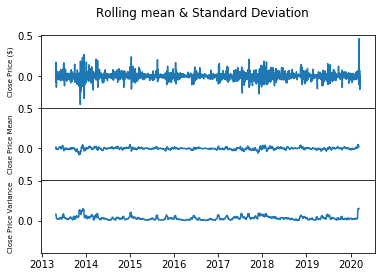

In [57]:
# bitcoin_close_price_logScale_diff.head()
def plot_ma_std_with_index(timeseries, column, interval):
    rolmean = timeseries[column].rolling(window=interval).mean()
    rolstd = timeseries[column].rolling(interval).std()
    
    fig, axs = plt.subplots(3, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
    fig.suptitle('Rolling mean & Standard Deviation')
    axs[0].set_ylabel('Close Price ($)', fontsize=7)
    axs[0].set_xlabel('Time', fontsize=12)
    axs[0].plot(timeseries.index, timeseries[column])
    axs[1].set_ylabel('Close Price Mean', fontsize=7)
    axs[1].plot(timeseries.index, rolmean)
    axs[2].set_ylabel('Close Price Variance', fontsize=7)
    axs[2].plot(timeseries.index, rolstd)

plot_ma_std_with_index(bitcoin_close_price_logScale_diff,'Close**', 12)

In [58]:
new_bitcoin_close_price_logScale_diff = bitcoin_close_price_logScale_diff['Close**']
print(new_bitcoin_close_price_logScale_diff.head())

Date
2020-03-20    0.002214
2020-03-19   -0.001225
2020-03-18   -0.167104
2020-03-17   -0.002448
2020-03-16   -0.041246
Name: Close**, dtype: float64


In [59]:
# So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and 
#infer that the time series is indeed stationary.
from statsmodels.tsa.stattools import adfuller
from numpy import log
# new_bitcoin_close_price_logScale_diff.reset_index(drop=True, inplace=True)
result = adfuller(new_bitcoin_close_price_logScale_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -9.369292
p-value: 0.000000


In [60]:
new_bitcoin_close_price_logScale_diff .reset_index(drop=True)
new_bitcoin_close_price_logScale_diff.head()

Date
2020-03-20    0.002214
2020-03-19   -0.001225
2020-03-18   -0.167104
2020-03-17   -0.002448
2020-03-16   -0.041246
Name: Close**, dtype: float64

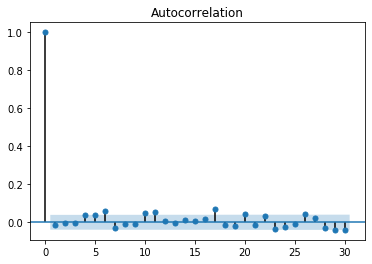

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(new_bitcoin_close_price_logScale_diff.dropna(), lags=30)
plt.show()

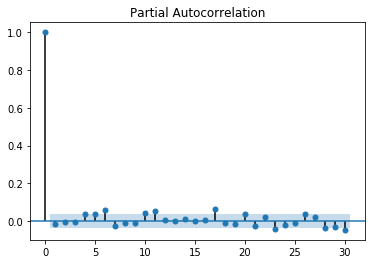

In [62]:
plot_pacf(new_bitcoin_close_price_logScale_diff.dropna(), lags=30)
plt.show()

In [63]:
from statsmodels.tsa.arima_model import ARIMA
model2 = ARIMA(new_bitcoin_close_price_logScale_diff.dropna(), order=(6,1,2))
model2_fit = model2.fit(disp=0)
print(model2_fit.summary())

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.Close**   No. Observations:                 2518
Model:                 ARIMA(6, 1, 2)   Log Likelihood                4323.224
Method:                       css-mle   S.D. of innovations              0.043
Date:                Sun, 17 May 2020   AIC                          -8626.449
Time:                        22:21:48   BIC                          -8568.137
Sample:                    03-19-2020   HQIC                         -8605.287
                         - 04-28-2013                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.514e-06    5.8e-06     -0.261      0.794   -1.29e-05    9.85e-06
ar.L1.D.Close**    -0.6884      0.195     -3.537      0.000      -1.070      -0.307
ar.L2.D.Close**    -0.0206      

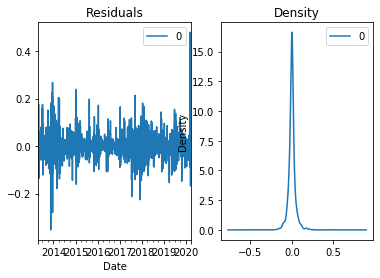

In [64]:
residuals = pd.DataFrame(model2_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

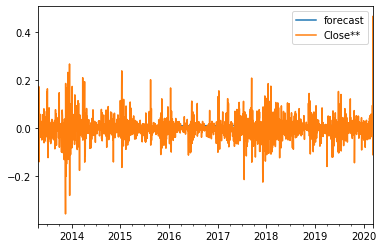

In [65]:
model2_fit.plot_predict(dynamic=True)
plt.show()

In [66]:
model3 = ARIMA(new_bitcoin_close_price_logScale_diff.dropna(), order=(6,0,6))
model3_fit = model3.fit(disp=0)
print(model3_fit.summary())

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [ ]:
# Start using original dataset here
# beacause applying d=0 to an Arima model seems not working. 

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

bitcoin_price_orig_close = bitcoin_price_short['Close**']
result = adfuller(bitcoin_price_orig_close.dropna())
print(result[0], result[1])


-2.1123828910747777 0.23956461943139978


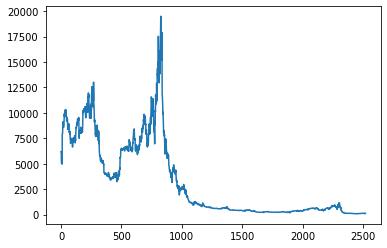

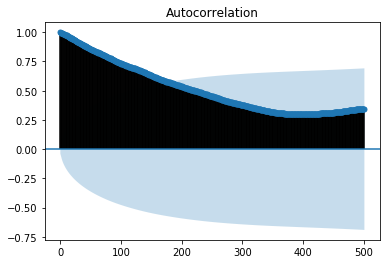

In [68]:
plt.plot(bitcoin_price_orig_close.dropna())
plot_acf(bitcoin_price_orig_close.dropna(), lags=500)
plt.show()

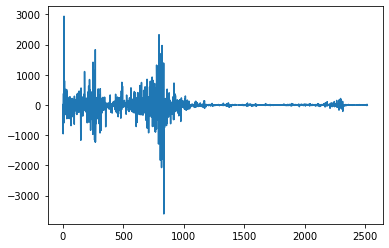

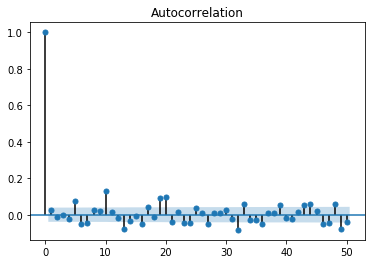

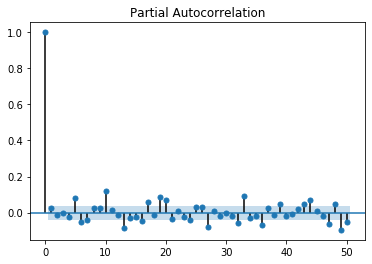

In [69]:
plt.plot(bitcoin_price_orig_close.diff().dropna())
plot_acf(bitcoin_price_orig_close.diff().dropna(), lags=50)
plot_pacf(bitcoin_price_orig_close.diff().dropna(), lags=50)
plt.show()

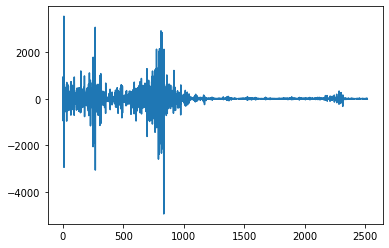

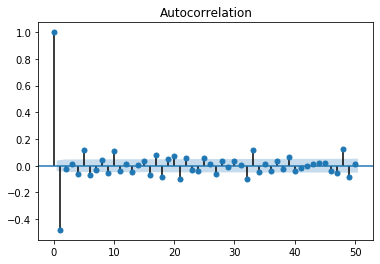

In [70]:
plt.plot(bitcoin_price_orig_close.diff().diff().dropna())
plot_acf(bitcoin_price_orig_close.diff().diff().dropna(), lags=50)
plt.show()
# Because the acf plot goes into negative zone fairly quick, which indicates the sereis might have been over differenced.
# So 1, is taken for d

In [71]:
from pmdarima.arima.utils import ndiffs

ndiffs(bitcoin_price_orig_close, test='adf')

1

In [72]:
ndiffs(bitcoin_price_orig_close, test='kpss')

1

In [73]:
ndiffs(bitcoin_price_orig_close, test='pp')

1

In [74]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(bitcoin_price_orig_close, order=(5,1,5))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


                             ARIMA Model Results                              
Dep. Variable:              D.Close**   No. Observations:                 2519
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -17511.938
Method:                       css-mle   S.D. of innovations            252.885
Date:                Sun, 17 May 2020   AIC                          35047.877
Time:                        22:24:59   BIC                          35117.856
Sample:                             1   HQIC                         35073.273
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.3753      5.468     -0.434      0.664     -13.092       8.341
ar.L1.D.Close**    -0.2700      0.212     -1.274      0.203      -0.685       0.145
ar.L2.D.Close**    -0.0676      

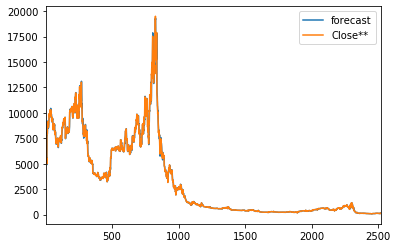

In [75]:
model_fit.plot_predict(dynamic=False)
# plt.xlim(560, 571)
plt.show()

In [76]:
adf_test(bitcoin_price_orig_close.diff().dropna())

Results of Dickey-Fuller Test: 
Test Statistic                  -9.826749e+00
p-value                          5.163464e-17
#Lags Used                       2.600000e+01
Number of Oberservations Used    2.492000e+03
Critical Value (1%)             -3.432977e+00
Critical Value (5%)             -2.862701e+00
Critical Value (10%)            -2.567388e+00
dtype: float64


In [77]:
kpss_test(bitcoin_price_orig_close.diff().dropna())

Results of KPSS Test:
Test Statistic            0.03995
p-value                   0.10000
Lags Used                27.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


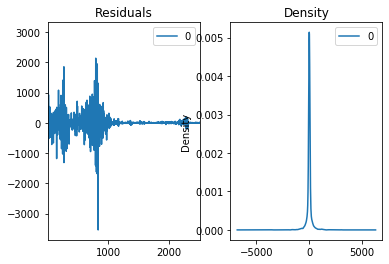

In [78]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

                             ARIMA Model Results                              
Dep. Variable:              D.Close**   No. Observations:                 2141
Model:                 ARIMA(4, 1, 4)   Log Likelihood              -15046.933
Method:                       css-mle   S.D. of innovations            272.112
Date:                Sun, 17 May 2020   AIC                          30113.865
Time:                        22:25:25   BIC                          30170.555
Sample:                             1   HQIC                         30134.609
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.1759      6.009     -0.529      0.597     -14.953       8.601
ar.L1.D.Close**    -0.2053      0.009    -21.933      0.000      -0.224      -0.187
ar.L2.D.Close**     1.3720      

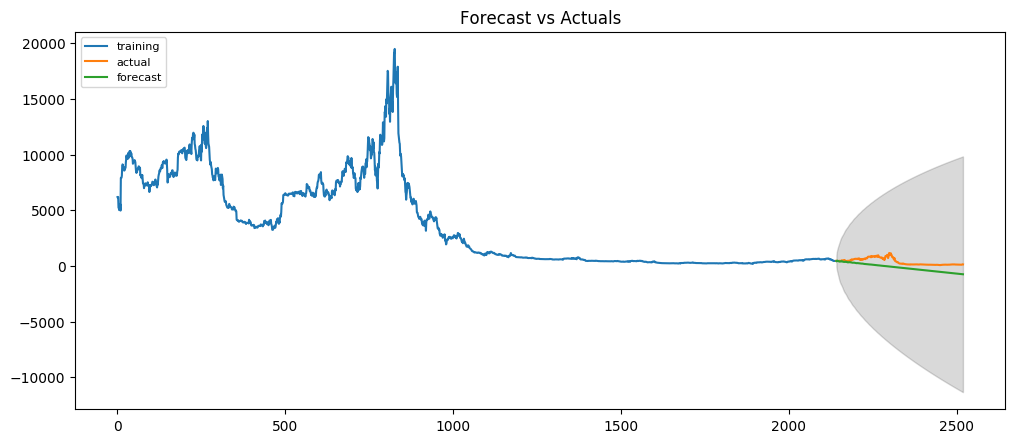

In [79]:
split_point = int(len(bitcoin_price_orig_close) * 0.85)
train = bitcoin_price_orig_close[:split_point]
test = bitcoin_price_orig_close[split_point:]
model = ARIMA(train.dropna(), order=(4, 1, 4))
fitted = model.fit(disp=-1)
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(378, alpha=0.05)
#  Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index = test.index)
upper_series = pd.Series(conf[:, 1], index = test.index)

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# model = ARIMA(train.dropna(), order=(5, 1, 5))

In [80]:
def forecast_accuray(forecast, actual):
    mape = np.mean(np.abs((actual - forecast)/actual)) # MAPE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    corr = np.corrcoef(forecast, actual)[0, 1] #corr
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return {'mape': mape, 'corr': corr, 'mpe': mpe, 'rmse': rmse}

# forecast_accuray(fc, test.values)

In [81]:
from sklearn.metrics import r2_score
r2_score(fc, test.values)

-1.9244540027810952

In [82]:
# Auto Arima
import pmdarima as pm
auto_arima_model = pm.auto_arima(bitcoin_price_orig_close, start_p=1, start_q=1, test='adf', max_p=6, max_q=6, m=1, d=None, seasonal=False, start_P=0, D=0, trace=True, error_action='ignore', supress_warning=True, stepwise=True)
print(auto_arima_model.summary())

Fit ARIMA: order=(1, 1, 1); AIC=35092.292, BIC=35115.619, Fit time=0.351 seconds
Fit ARIMA: order=(0, 1, 0); AIC=35092.644, BIC=35104.307, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=35093.205, BIC=35110.700, Fit time=0.018 seconds
Fit ARIMA: order=(0, 1, 1); AIC=35093.165, BIC=35110.660, Fit time=0.019 seconds
Fit ARIMA: order=(2, 1, 1); AIC=35096.696, BIC=35125.854, Fit time=0.384 seconds
Fit ARIMA: order=(1, 1, 2); AIC=35096.699, BIC=35125.858, Fit time=0.318 seconds
Fit ARIMA: order=(2, 1, 2); AIC=35058.096, BIC=35093.086, Fit time=4.549 seconds


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Fit ARIMA: order=(3, 1, 2); AIC=nan, BIC=nan, Fit time=1.032 seconds
Fit ARIMA: order=(2, 1, 3); AIC=35097.806, BIC=35138.627, Fit time=1.293 seconds


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Fit ARIMA: order=(3, 1, 3); AIC=35068.116, BIC=35114.769, Fit time=2.660 seconds
Total fit time: 10.638 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2519
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -17523.048
Method:                       css-mle   S.D. of innovations            253.683
Date:                Sun, 17 May 2020   AIC                          35058.096
Time:                        22:25:55   BIC                          35093.086
Sample:                             1   HQIC                         35070.794
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4332      5.165     -0.471      0.638     -12.556       7.689
ar.L1.D.y     -1.92

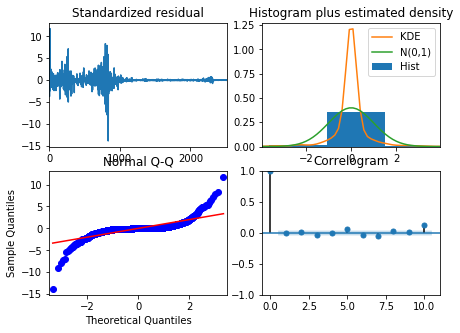

In [83]:
auto_arima_model.plot_diagnostics(figsize=(7,5))
plt.show()

In [84]:
from statsmodels.tsa.arima_model import ARIMA
model212 = ARIMA(train.dropna(), order=(2,1,2))
model212_fit = model212.fit(disp=-1)
print(model212_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:              D.Close**   No. Observations:                 2141
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -15067.388
Method:                       css-mle   S.D. of innovations            275.096
Date:                Sun, 17 May 2020   AIC                          30146.777
Time:                        22:27:14   BIC                          30180.791
Sample:                             1   HQIC                         30159.223
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -17.6219      6.093     -2.892      0.004     -29.564      -5.680
ar.L1.D.Close**    -1.9205      0.007   -281.669      0.000      -1.934      -1.907
ar.L2.D.Close**    -0.9580      

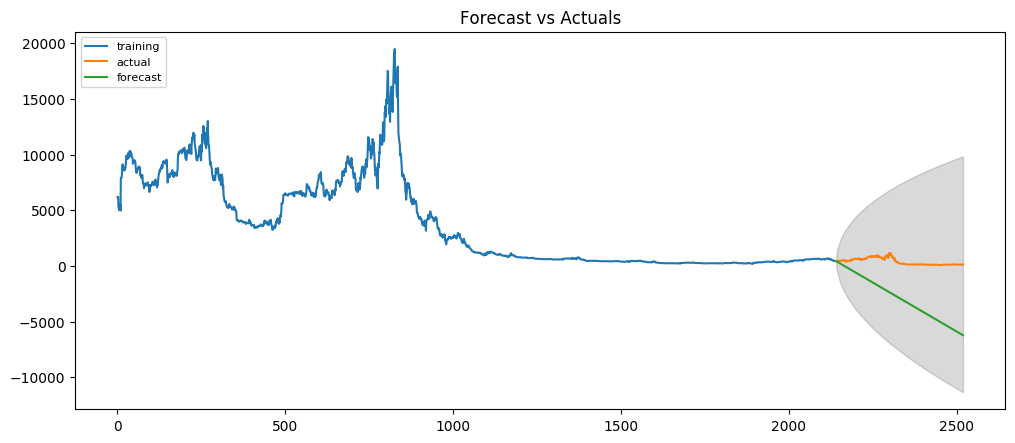

{'mape': 22.098863650042375,
 'corr': 0.7115513216733085,
 'mpe': -22.098863650042375,
 'rmse': 3716.9583240683187}

In [85]:
# Forecast
fc212, se212, conf212 = model212_fit.forecast(378, alpha=0.05)
#  Make as pandas series
fc212_series = pd.Series(fc212, index=test.index)
lower_series_212 = pd.Series(conf[:, 0], index = test.index)
upper_series_212 = pd.Series(conf[:, 1], index = test.index)

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc212_series, label='forecast')
plt.fill_between(lower_series_212.index, lower_series_212, upper_series_212, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()



forecast_accuray(fc212, test.values)

In [86]:
# LSTM
lstm_bitcoin_price = bitcoin_price.copy()
lstm_bitcoin_price.head()

,Close**,Date,High,Low,Market Cap,Open*,Volume
0,6185.07,2020-03-21,6378.14,5932.82,1.130682e+11,6206.52,42494390880
1,6198.78,2020-03-20,6844.26,5865.78,1.133092e+11,6191.65,54442976103
2,6191.19,2020-03-19,6329.74,5236.97,1.131621e+11,5245.42,51000731797
3,5238.44,2020-03-18,5331.83,5069.34,9.574072e+10,5227.11,37878801016
4,5225.63,2020-03-17,5371.35,4981.91,9.549994e+10,5002.58,38622642935


In [87]:
kwargs = {'OHLC_avg': lambda x: (x['Open*'] + x['High'] + x['Low'] + x['Close**'])/4}
lstm_bitcoin_price = lstm_bitcoin_price.assign(**kwargs)
lstm_bitcoin_price = lstm_bitcoin_price.sort_values(by='Date')
lstm_bitcoin_price.head()

,Close**,Date,High,Low,Market Cap,Open*,Volume,OHLC_avg
2519,134.21,2013-04-28,135.98,132.10,1.488567e+09,135.30,0,134.3975
2518,144.54,2013-04-29,147.49,134.00,1.603769e+09,134.44,0,140.1175
2517,139.00,2013-04-30,146.93,134.05,1.542813e+09,144.00,0,140.9950
2516,116.99,2013-05-01,139.89,107.72,1.298955e+09,139.00,0,125.9000
2515,105.21,2013-05-02,125.60,92.28,1.168517e+09,116.38,0,109.8675


In [88]:
start_date = lstm_bitcoin_price['Date'].values[0]
start_date

numpy.datetime64('2013-04-28T00:00:00.000000000')

In [89]:
end_date = lstm_bitcoin_price['Date'].values[-1]
end_date


numpy.datetime64('2020-03-21T00:00:00.000000000')

In [90]:
data_length_in_days = (lstm_bitcoin_price.Date.values[-1] - lstm_bitcoin_price.Date.values[0]).astype('timedelta64[D]')
data_length_in_days

numpy.timedelta64(2519,'D')

In [91]:
split_point = lstm_bitcoin_price['Date'].values[0] + data_length_in_days * 0.8
split_point

numpy.datetime64('2018-11-03T00:00:00.000000000')

In [92]:
lstm_bitcoin_price_idx = lstm_bitcoin_price.set_index(["Date"], drop=True)
lstm_bitcoin_price_data = lstm_bitcoin_price_idx[['Close**']]
lstm_bitcoin_price_data_train = lstm_bitcoin_price_data[:split_point]
lstm_bitcoin_price_data_test = lstm_bitcoin_price_data[split_point:]
print(lstm_bitcoin_price_data_train.head())
print(lstm_bitcoin_price_data_test.head())

            Close**
Date               
2013-04-28   134.21
2013-04-29   144.54
2013-04-30   139.00
2013-05-01   116.99
2013-05-02   105.21
            Close**
Date               
2018-11-03  6361.26
2018-11-04  6376.13
2018-11-05  6419.66
2018-11-06  6461.01
2018-11-07  6530.14


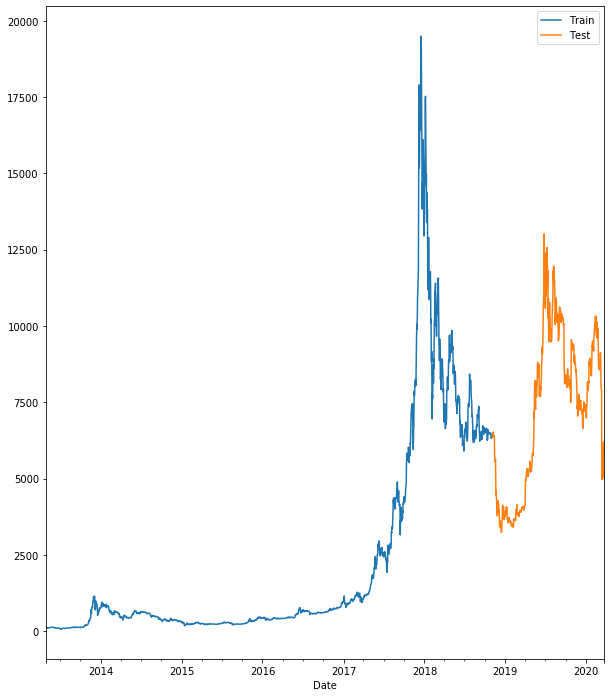

In [93]:
ax = lstm_bitcoin_price_data_train.plot(figsize=(10, 12))
lstm_bitcoin_price_data_test.plot(ax=ax)
plt.legend(['Train', 'Test'])
plt.show()

In [94]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
lstm_bitcoin_price_data_train_sc = sc.fit_transform(lstm_bitcoin_price_data_train)
lstm_bitcoin_price_data_test_sc = sc.fit_transform(lstm_bitcoin_price_data_test)
print(lstm_bitcoin_price_data_train_sc)
print(lstm_bitcoin_price_data_test_sc)

[[0.00338567]
 [0.00391735]
 [0.0036322 ]
 ...
 [0.32473929]
 [0.32528796]
 [0.32388902]]
[[3.19495842e-01]
 [3.21016374e-01]
 [3.25467536e-01]
 [3.29695781e-01]
 [3.36764671e-01]
 [3.28950342e-01]
 [3.21986774e-01]
 [3.24399993e-01]
 [3.24609616e-01]
 [3.20519415e-01]
 [3.19314850e-01]
 [2.55800161e-01]
 [2.46564487e-01]
 [2.39153042e-01]
 [2.36983190e-01]
 [2.44060261e-01]
 [1.67159365e-01]
 [1.24251110e-01]
 [1.39620041e-01]
 [1.15464335e-01]
 [1.13538873e-01]
 [6.58522394e-02]
 [7.90646119e-02]
 [5.54600607e-02]
 [5.97128474e-02]
 [1.04367619e-01]
 [1.06558944e-01]
 [7.98110736e-02]
 [9.99962166e-02]
 [9.23485629e-02]
 [6.72193892e-02]
 [7.36369149e-02]
 [5.28893693e-02]
 [2.90751953e-02]
 [1.87310764e-02]
 [2.44747415e-02]
 [3.85982062e-02]
 [2.71896125e-02]
 [1.92065623e-02]
 [2.55831860e-02]
 [7.86545692e-03]
 [5.84898773e-04]
 [0.00000000e+00]
 [1.64426089e-03]
 [3.16070298e-02]
 [4.69657354e-02]
 [5.20672388e-02]
 [9.17922955e-02]
 [6.74658238e-02]
 [7.94951056e-02]
 [7.794082

In [95]:
lstm_bt_train_sc_df = pd.DataFrame(lstm_bitcoin_price_data_train_sc, columns=['Y'], index=lstm_bitcoin_price_data_train.index)
lstm_bt_test_sc_df = pd.DataFrame(lstm_bitcoin_price_data_test_sc, columns=['Y'], index=lstm_bitcoin_price_data_test.index)
# print(lstm_bt_train_sc_df)

lstm_bt_train_sc_df['X_{}'.format(1)]=lstm_bt_train_sc_df['Y'].shift(1)
lstm_bt_test_sc_df['X_{}'.format(1)]=lstm_bt_test_sc_df['Y'].shift(1)
# print(lstm_bt_train_sc_df)

X_train = lstm_bt_train_sc_df.dropna().drop('Y', axis=1)
y_train = lstm_bt_train_sc_df.dropna().drop('X_1', axis=1)
# print(X_train)
# print(y_train)
X_test = lstm_bt_test_sc_df.dropna().drop('Y', axis=1)
y_test = lstm_bt_test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[0.00338567]
 [0.00391735]
 [0.0036322 ]
 ...
 [0.32164237]
 [0.32473929]
 [0.32528796]]
[[0.00391735]
 [0.0036322 ]
 [0.00249936]
 ...
 [0.32473929]
 [0.32528796]
 [0.32388902]]
[[3.19495842e-01]
 [3.21016374e-01]
 [3.25467536e-01]
 [3.29695781e-01]
 [3.36764671e-01]
 [3.28950342e-01]
 [3.21986774e-01]
 [3.24399993e-01]
 [3.24609616e-01]
 [3.20519415e-01]
 [3.19314850e-01]
 [2.55800161e-01]
 [2.46564487e-01]
 [2.39153042e-01]
 [2.36983190e-01]
 [2.44060261e-01]
 [1.67159365e-01]
 [1.24251110e-01]
 [1.39620041e-01]
 [1.15464335e-01]
 [1.13538873e-01]
 [6.58522394e-02]
 [7.90646119e-02]
 [5.54600607e-02]
 [5.97128474e-02]
 [1.04367619e-01]
 [1.06558944e-01]
 [7.98110736e-02]
 [9.99962166e-02]
 [9.23485629e-02]
 [6.72193892e-02]
 [7.36369149e-02]
 [5.28893693e-02]
 [2.90751953e-02]
 [1.87310764e-02]
 [2.44747415e-02]
 [3.85982062e-02]
 [2.71896125e-02]
 [1.92065623e-02]
 [2.55831860e-02]
 [7.86545692e-03]
 [5.84898773e-04]
 [0.00000000e+00]
 [1.64426089e-03]
 [3.16070298e-02]
 [4.696573

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [96]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
# 1 Hidden layer with 1 neurone and tanh function
K.clear_session()
model=Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1], ), activation='tanh', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Using TensorFlow backend.


Epoch 1/20
2015/2015 [==============================] - 0s 104us/step - loss: 0.0045
Epoch 2/20
2015/2015 [==============================] - 0s 67us/step - loss: 0.0029
Epoch 3/20
2015/2015 [==============================] - 0s 67us/step - loss: 0.0019
Epoch 4/20
2015/2015 [==============================] - 0s 66us/step - loss: 0.0013
Epoch 5/20
2015/2015 [==============================] - 0s 67us/step - loss: 8.6644e-04
Epoch 6/20
2015/2015 [==============================] - 0s 66us/step - loss: 6.3296e-04
Epoch 7/20
2015/2015 [==============================] - 0s 70us/step - loss: 5.0187e-04
Epoch 8/20
2015/2015 [==============================] - 0s 67us/step - loss: 4.3308e-04
Epoch 9/20
2015/2015 [==============================] - 0s 68us/step - loss: 3.9824e-04
Epoch 10/20
2015/2015 [==============================] - 0s 67us/step - loss: 3.8295e-04
Epoch 11/20
2015/2015 [==============================] - 0s 70us/step - loss: 3.7667e-04
Epoch 12/20
2015/2015 [======================

R-Squared: 0.967088


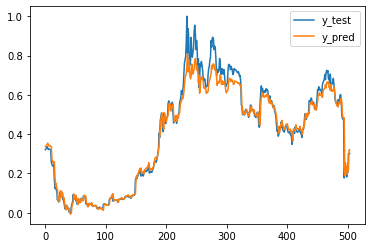

In [97]:
# R-squared is not stable. changes from 0.46to 0.94
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)

plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['y_test', 'y_pred'])
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [98]:
# Hidden layers with 50 neuorons each and ReLu activation function
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1], ), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1], ), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
2015/2015 [==============================] - 0s 149us/step - loss: 3.9924e-04
Epoch 2/20
2015/2015 [==============================] - 0s 87us/step - loss: 2.0700e-04
Epoch 3/20
2015/2015 [==============================] - 0s 88us/step - loss: 2.9483e-04
Epoch 4/20
2015/2015 [==============================] - 0s 88us/step - loss: 3.2946e-04
Epoch 5/20
2015/2015 [==============================] - 0s 83us/step - loss: 2.9810e-04
Epoch 6/20
2015/2015 [==============================] - 0s 85us/step - loss: 1.9123e-04
Epoch 7/20
2015/2015 [==============================] - 0s 84us/step - loss: 2.3474e-04
Epoch 8/20
2015/2015 [==============================] - 0s 85us/step - loss: 2.4179e-04
Epoch 9/20
2015/2015 [==============================] - 0s 90us/step - loss: 2.1641e-04
Epoch 10/20
2015/2015 [==============================] - 0s 89us/step - loss: 3.2729e-04
Epoch 11/20
2015/2015 [==============================] - 0s 91us/step - loss: 2.4340e-04
Epoch 12/20
2015/2015 [======

R-Squared: 0.983977


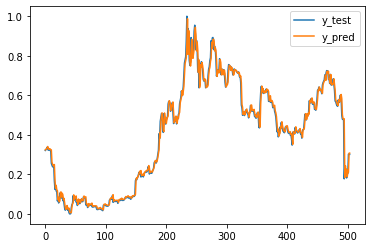

In [99]:
#Ran multi times. The R squared error is something btween 0.97 and 0.98
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['y_test', 'y_pred'])
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [100]:
np.set_printoptions(suppress=True)
print(y_test)
print(y_pred)

[[0.32101637]
 [0.32546754]
 [0.32969578]
 [0.33676467]
 [0.32895034]
 [0.32198677]
 [0.32439999]
 [0.32460962]
 [0.32051941]
 [0.31931485]
 [0.25580016]
 [0.24656449]
 [0.23915304]
 [0.23698319]
 [0.24406026]
 [0.16715937]
 [0.12425111]
 [0.13962004]
 [0.11546433]
 [0.11353887]
 [0.06585224]
 [0.07906461]
 [0.05546006]
 [0.05971285]
 [0.10436762]
 [0.10655894]
 [0.07981107]
 [0.09999622]
 [0.09234856]
 [0.06721939]
 [0.07363691]
 [0.05288937]
 [0.0290752 ]
 [0.01873108]
 [0.02447474]
 [0.03859821]
 [0.02718961]
 [0.01920656]
 [0.02558319]
 [0.00786546]
 [0.0005849 ]
 [0.        ]
 [0.00164426]
 [0.03160703]
 [0.04696574]
 [0.05206724]
 [0.0917923 ]
 [0.06746582]
 [0.07949511]
 [0.07794083]
 [0.08608237]
 [0.05917805]
 [0.06345334]
 [0.04274976]
 [0.07026557]
 [0.05968115]
 [0.06433784]
 [0.05173491]
 [0.06204426]
 [0.07225852]
 [0.06135097]
 [0.06349628]
 [0.06221503]
 [0.08588093]
 [0.08062707]
 [0.0811997 ]
 [0.08165473]
 [0.04521308]
 [0.04607714]
 [0.04341135]
 [0.03233202]
 [0.04

In [101]:
r2_score(y_test, y_pred)

0.9839765512251273

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean absolute error is: %f'%mean_absolute_error(y_test, y_pred))
print('Mean squared error is: %f'%mean_squared_error(y_test, y_pred))



Mean absolute error is: 0.019881
Mean squared error is: 0.001110


In [103]:
# AIRMA again
arima_bitcoin_price_data = lstm_bitcoin_price_idx[['Close**']].copy()
arima_bitcoin_price_data.reset_index(drop=True, inplace=True)
split_point = int(len(arima_bitcoin_price_data) * 0.80)
print(split_point)
arima_bitcoin_price_data_train = arima_bitcoin_price_data[:split_point]
arima_bitcoin_price_data_test = arima_bitcoin_price_data[split_point:]
print(arima_bitcoin_price_data_train.tail())
print(arima_bitcoin_price_data_test.head())

2016
      Close**
2011  6334.27
2012  6317.61
2013  6377.78
2014  6388.44
2015  6361.26
      Close**
2016  6376.13
2017  6419.66
2018  6461.01
2019  6530.14
2020  6453.72


In [104]:
print(len(arima_bitcoin_price_data_test))

504


In [105]:
from statsmodels.tsa.arima_model import ARIMA
arima_model = ARIMA(arima_bitcoin_price_data_train, order=(5,1,5))
arima_model_fit = arima_model.fit(disp=0)
print(arima_model_fit.summary()) 

                             ARIMA Model Results                              
Dep. Variable:              D.Close**   No. Observations:                 2015
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -13753.343
Method:                       css-mle   S.D. of innovations            222.710
Date:                Sun, 17 May 2020   AIC                          27530.686
Time:                        22:28:08   BIC                          27597.986
Sample:                             1   HQIC                         27555.388
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.1547      6.080      0.519      0.604      -8.762      15.071
ar.L1.D.Close**     0.5926      0.090      6.581      0.000       0.416       0.769
ar.L2.D.Close**     0.8628      

In [106]:
# Auto Arima
import pmdarima as pm
auto_arima_model = pm.auto_arima(arima_bitcoin_price_data_train, start_p=1, start_q=1, test='adf', max_p=6, max_q=6, m=1, d=None, seasonal=False, start_P=0, D=0, trace=True, error_action='ignore', supress_warning=True, stepwise=True)
print(auto_arima_model.summary())

Fit ARIMA: order=(1, 1, 1); AIC=27709.329, BIC=27731.763, Fit time=0.288 seconds
Fit ARIMA: order=(0, 1, 0); AIC=27728.574, BIC=27739.791, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=27718.142, BIC=27734.967, Fit time=0.020 seconds
Fit ARIMA: order=(0, 1, 1); AIC=27717.214, BIC=27734.039, Fit time=0.021 seconds
Fit ARIMA: order=(2, 1, 1); AIC=27718.075, BIC=27746.117, Fit time=0.305 seconds
Fit ARIMA: order=(1, 1, 2); AIC=27718.279, BIC=27746.321, Fit time=0.357 seconds
Fit ARIMA: order=(2, 1, 2); AIC=27713.111, BIC=27746.761, Fit time=1.050 seconds
Total fit time: 2.055 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2015
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13850.665
Method:                       css-mle   S.D. of innovations            233.886
Date:                Sun, 17 May 2020   AIC                          27709.329
Time:   

In [107]:
arima_model_212 = ARIMA(arima_bitcoin_price_data_train, order=(2,1,2))
arima_model_212_fit = arima_model_212.fit(disp=0)
print(arima_model_212_fit.summary()) 

                             ARIMA Model Results                              
Dep. Variable:              D.Close**   No. Observations:                 2015
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -13850.556
Method:                       css-mle   S.D. of innovations            233.873
Date:                Sun, 17 May 2020   AIC                          27713.111
Time:                        22:28:19   BIC                          27746.761
Sample:                             1   HQIC                         27725.462
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.0882      5.728      0.539      0.590      -8.138      14.315
ar.L1.D.Close**     0.2464      0.149      1.658      0.097      -0.045       0.538
ar.L2.D.Close**     0.6080      

In [108]:
arima_model_414 = ARIMA(arima_bitcoin_price_data_train, order=(4,1,4))
arima_model_414_fit = arima_model_414.fit(disp=0)
print(arima_model_414_fit.summary()) 

                             ARIMA Model Results                              
Dep. Variable:              D.Close**   No. Observations:                 2015
Model:                 ARIMA(4, 1, 4)   Log Likelihood              -13775.884
Method:                       css-mle   S.D. of innovations            225.126
Date:                Sun, 17 May 2020   AIC                          27571.767
Time:                        22:28:26   BIC                          27627.851
Sample:                             1   HQIC                         27592.352
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.1447      4.746      0.663      0.508      -6.158      12.447
ar.L1.D.Close**    -0.1365      0.014     -9.416      0.000      -0.165      -0.108
ar.L2.D.Close**     1.0771      

In [109]:
arima_model_616 = ARIMA(arima_bitcoin_price_data_train, order=(6,1,6))
arima_model_616_fit = arima_model_616.fit(disp=0)
print(arima_model_616_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.Close**   No. Observations:                 2015
Model:                 ARIMA(6, 1, 6)   Log Likelihood              -13752.364
Method:                       css-mle   S.D. of innovations            222.602
Date:                Sun, 17 May 2020   AIC                          27532.728
Time:                        22:29:32   BIC                          27611.245
Sample:                             1   HQIC                         27561.547
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.1441      5.200      0.605      0.545      -7.047      13.336
ar.L1.D.Close**    -0.3380      0.158     -2.135      0.033      -0.648      -0.028
ar.L2.D.Close**     0.4339      

In [110]:
# After comparing AIC value, 5, 1, 5 is the option for ARIMA
# When p, d, q is 6, 1, 6, the AIC value is increased. So 5, 1, 5 is the best option. 


504


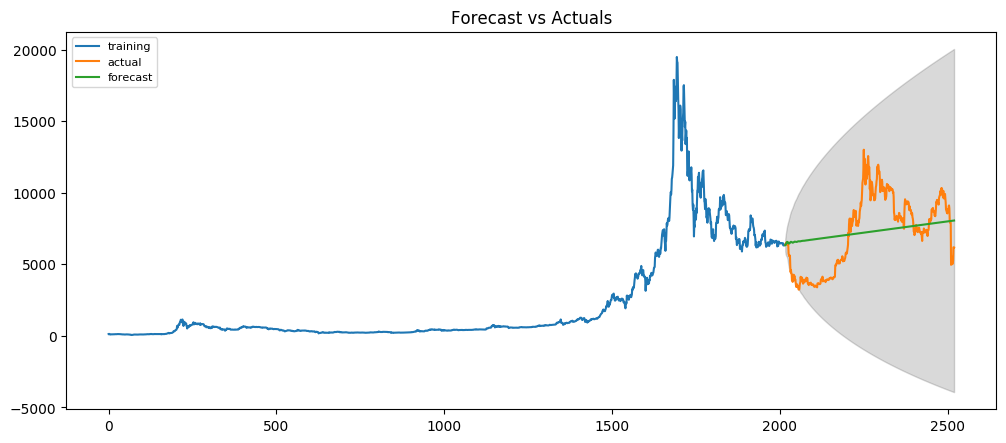

In [111]:
# Forecast
fc515, se515, conf515 = arima_model_fit.forecast(504, alpha=0.05)

#  Make as pandas series
fc_series515 = pd.Series(fc515, index=arima_bitcoin_price_data_test.index)
print(len(arima_bitcoin_price_data_test.index))
lower_series515 = pd.Series(conf515[:, 0], index = arima_bitcoin_price_data_test.index)
upper_series515 = pd.Series(conf515[:, 1], index = arima_bitcoin_price_data_test.index)

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(arima_bitcoin_price_data_train, label='training')
plt.plot(arima_bitcoin_price_data_test, label='actual')
plt.plot(fc_series515, label='forecast')
plt.fill_between(lower_series515.index, lower_series515, upper_series515, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# ARIMA model (5, 1, 5) fit R2

In [112]:
r2_score(fc_series515.values, arima_bitcoin_price_data_test.values.flatten()) 

-24.07572711484598

In [113]:
forecast_accuray(fc_series515.values, arima_bitcoin_price_data_test.values.flatten())

{'mape': 0.3422101622737359,
 'corr': 0.6494833897629625,
 'mpe': 0.14985971738717813,
 'rmse': 2302.4720650526842}

In [114]:
print('Mean absolute error is: %f'%mean_absolute_error(arima_bitcoin_price_data_test.values.flatten(), fc_series515.values))
print('Mean squared error is: %f'%mean_squared_error(arima_bitcoin_price_data_test.values.flatten(), fc_series515.values))

Mean absolute error is: 1970.540257
Mean squared error is: 5301377.610348


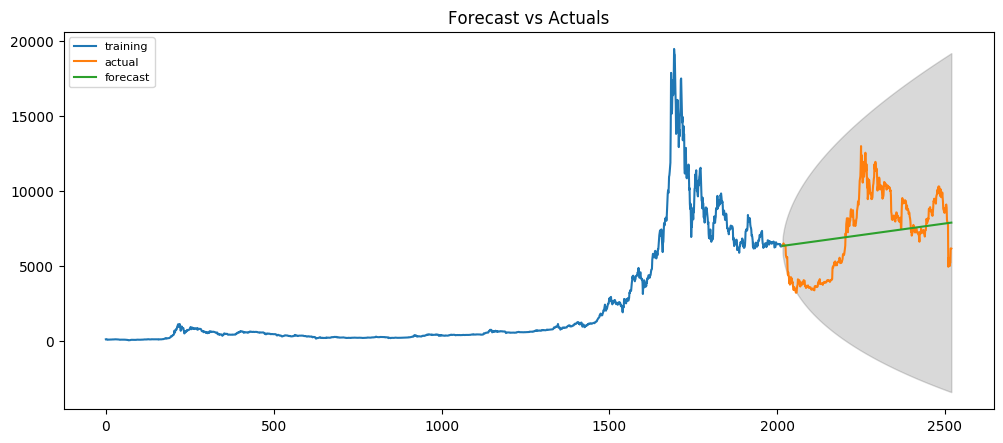

In [115]:
# Forecast
fc212, se212, conf212 = arima_model_212_fit.forecast(504, alpha=0.05)

#  Make as pandas series
fc_series212 = pd.Series(fc212, index=arima_bitcoin_price_data_test.index)
lower_series212 = pd.Series(conf212[:, 0], index = arima_bitcoin_price_data_test.index)
upper_series212 = pd.Series(conf212[:, 1], index = arima_bitcoin_price_data_test.index)

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(arima_bitcoin_price_data_train, label='training')
plt.plot(arima_bitcoin_price_data_test, label='actual')
plt.plot(fc_series212, label='forecast')
plt.fill_between(lower_series212.index, lower_series212, upper_series212, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [116]:
print('Mean absolute error is: %f'%mean_absolute_error(arima_bitcoin_price_data_test.values.flatten(), fc_series212.values))
print('Mean squared error is: %f'%mean_squared_error(arima_bitcoin_price_data_test.values.flatten(), fc_series212.values))

Mean absolute error is: 1979.878739
Mean squared error is: 5332909.733582


In [ ]:
# Rolling ARMIA forecast

In [ ]:
# import pandas as pd
# from pandas import datetime
# from matplotlib import pyplot
# from sklearn.metrics import mean_squared_error
 
# def parser(x):
#     return datetime.strptime('190'+x, '%Y-%m')

In [ ]:
# url = "https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130101&end=20200320"
# data_for_rolling_arima = pd.read_html(url)
# # The scrapped data is a list. Converting the list to a dataframe 
# data_for_rolling_arima = pd.concat(data_for_rolling_arima)
# data_for_rolling_arima = data_for_rolling_arima['Close**']
# data_for_rolling_arima

In [ ]:
# split_point = int(len(data_for_rolling_arima)*0.8)
# split_point

In [ ]:
# data_for_rolling_arima_train = data_for_rolling_arima[:split_point]
# data_for_rolling_arima_test = data_for_rolling_arima[split_point:]
# print(data_for_rolling_arima_train)
# print(data_for_rolling_arima_test)

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
# history = [x for x in data_for_rolling_arima_train]
# predictions = list()
# for t in range(2016, 2016+len(data_for_rolling_arima_test)):
#     rolling_arima_model = ARIMA(history, order=(5, 1, 5))
#     rolling_arima_model_fit = rolling_arima_model.fit(disp=0)
#     output = rolling_arima_model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
# #     print(t)
# #     print(data_for_rolling_arima_test)
#     obs = data_for_rolling_arima_test[t]
#     history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))


In [ ]:
# data_for_rolling_arima_test.reset_index(drop=True, inplace=True)

In [ ]:
# error = mean_squared_error(data_for_rolling_arima_test, predictions)
# print('Test MSE: %.3f' % error)

# from sklearn.metrics import r2_score
# print('R2 score: %f' % r2_score(data_for_rolling_arima_test, predictions))
# pyplot.figure(figsize=(20,10)) 

# pyplot.plot(data_for_rolling_arima_test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

In [ ]:
# Preparing the differenced data (Make the data staionary) for LSTM

In [123]:
lstm_bitcoin_price_data = lstm_bitcoin_price_idx[['Close**']]
lstm_bitcoin_price_data_diff = lstm_bitcoin_price_idx[['Close**']].diff()

split_point = int(len(arima_bitcoin_price_data) * 0.80)
print(split_point)
lstm_bitcoin_price_data_diff_train = lstm_bitcoin_price_data_diff[:split_point]
lstm_bitcoin_price_data_diff_test = lstm_bitcoin_price_data_diff[split_point:]

print(lstm_bitcoin_price_data_diff_train.head())
print(lstm_bitcoin_price_data_diff_test.head())


2016
            Close**
Date               
2013-04-28      NaN
2013-04-29    10.33
2013-04-30    -5.54
2013-05-01   -22.01
2013-05-02   -11.78
            Close**
Date               
2018-11-04    14.87
2018-11-05    43.53
2018-11-06    41.35
2018-11-07    69.13
2018-11-08   -76.42


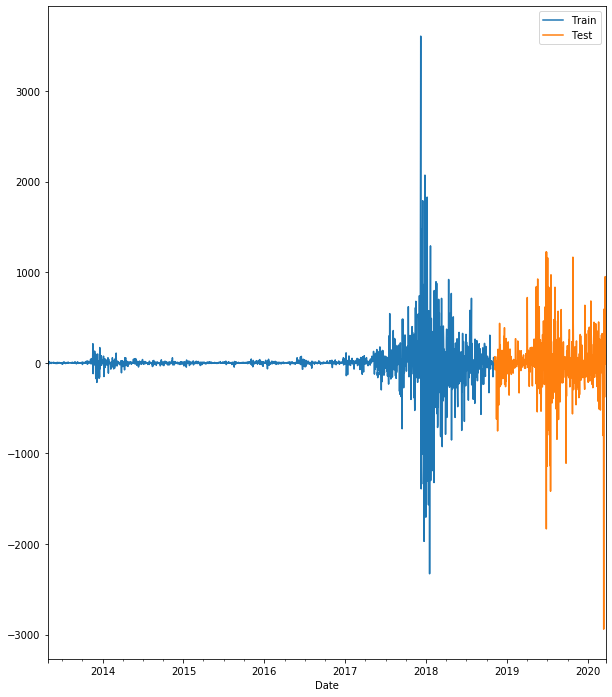

In [125]:
ax = lstm_bitcoin_price_data_diff_train.plot(figsize=(10, 12))
lstm_bitcoin_price_data_diff_test.plot(ax=ax)
plt.legend(['Train', 'Test'])
plt.show()

In [126]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
lstm_bitcoin_price_data_diff_train_sc = sc.fit_transform(lstm_bitcoin_price_data_diff_train)
lstm_bitcoin_price_data_diff_test_sc = sc.fit_transform(lstm_bitcoin_price_data_diff_test)
print(lstm_bitcoin_price_data_diff_train_sc)
print(lstm_bitcoin_price_data_diff_test_sc)

[[       nan]
 [0.39404295]
 [0.39137011]
 ...
 [0.40243705]
 [0.39409853]
 [0.38772547]]
[[0.70944442]
 [0.71632401]
 [0.71580072]
 [0.72246906]
 [0.68753106]
 [0.6895282 ]
 [0.71153998]
 [0.7063671 ]
 [0.69627336]
 [0.70304732]
 [0.55677577]
 [0.68419448]
 [0.68847682]
 [0.70078133]
 [0.72248827]
 [0.52535196]
 [0.60514889]
 [0.74195322]
 [0.64917006]
 [0.70135503]
 [0.59393176]
 [0.73689075]
 [0.65046388]
 [0.71585833]
 [0.81070104]
 [0.7110191 ]
 [0.64308501]
 [0.75325916]
 [0.68792232]
 [0.64688486]
 [0.72094   ]
 [0.65717063]
 [0.6499718 ]
 [0.68159243]
 [0.71935813]
 [0.73902951]
 [0.6790936 ]
 [0.68713499]
 [0.72084399]
 [0.66428306]
 [0.68878407]
 [0.70450197]
 [0.70973487]
 [0.77621191]
 [0.74192921]
 [0.71785067]
 [0.79912865]
 [0.64876919]
 [0.73411347]
 [0.70222638]
 [0.7249871 ]
 [0.64271775]
 [0.71591114]
 [0.65727385]
 [0.77046772]
 [0.68102834]
 [0.71680649]
 [0.67628992]
 [0.73007597]
 [0.72985273]
 [0.68026981]
 [0.71091108]
 [0.70286729]
 [0.76143017]
 [0.69354169]


In [128]:
lstm_bt_train_diff_sc_df = pd.DataFrame(lstm_bitcoin_price_data_diff_train_sc, columns=['Y'], index=lstm_bitcoin_price_data_diff_train.index)
lstm_bt_test_diff_sc_df = pd.DataFrame(lstm_bitcoin_price_data_diff_test_sc, columns=['Y'], index=lstm_bitcoin_price_data_diff_test.index)
# print(lstm_bt_train_sc_df)

lstm_bt_train_diff_sc_df['X_{}'.format(1)]=lstm_bt_train_diff_sc_df['Y'].shift(1)
lstm_bt_test_diff_sc_df['X_{}'.format(1)]=lstm_bt_test_diff_sc_df['Y'].shift(1)
# print(lstm_bt_train_sc_df)

X_train_diff = lstm_bt_train_diff_sc_df.dropna().drop('Y', axis=1)
y_train_diff = lstm_bt_train_diff_sc_df.dropna().drop('X_1', axis=1)
# print(X_train)
# print(y_train)
X_test_diff = lstm_bt_test_diff_sc_df.dropna().drop('Y', axis=1)
y_test_diff = lstm_bt_test_diff_sc_df.dropna().drop('X_1', axis=1)

X_train_diff = X_train_diff.as_matrix()
y_train_diff = y_train_diff.as_matrix()

X_test_diff = X_test_diff.as_matrix()
y_test_diff = y_test_diff.as_matrix()

print(X_train_diff)
print(y_train_diff)
print(X_test_diff)
print(y_test_diff)

[[0.39404295]
 [0.39137011]
 [0.38859621]
 ...
 [0.38949726]
 [0.40243705]
 [0.39409853]]
[[0.39137011]
 [0.38859621]
 [0.39031916]
 ...
 [0.40243705]
 [0.39409853]
 [0.38772547]]
[[0.70944442]
 [0.71632401]
 [0.71580072]
 [0.72246906]
 [0.68753106]
 [0.6895282 ]
 [0.71153998]
 [0.7063671 ]
 [0.69627336]
 [0.70304732]
 [0.55677577]
 [0.68419448]
 [0.68847682]
 [0.70078133]
 [0.72248827]
 [0.52535196]
 [0.60514889]
 [0.74195322]
 [0.64917006]
 [0.70135503]
 [0.59393176]
 [0.73689075]
 [0.65046388]
 [0.71585833]
 [0.81070104]
 [0.7110191 ]
 [0.64308501]
 [0.75325916]
 [0.68792232]
 [0.64688486]
 [0.72094   ]
 [0.65717063]
 [0.6499718 ]
 [0.68159243]
 [0.71935813]
 [0.73902951]
 [0.6790936 ]
 [0.68713499]
 [0.72084399]
 [0.66428306]
 [0.68878407]
 [0.70450197]
 [0.70973487]
 [0.77621191]
 [0.74192921]
 [0.71785067]
 [0.79912865]
 [0.64876919]
 [0.73411347]
 [0.70222638]
 [0.7249871 ]
 [0.64271775]
 [0.71591114]
 [0.65727385]
 [0.77046772]
 [0.68102834]
 [0.71680649]
 [0.67628992]
 [0.7300

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [135]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
# 1 Hidden layer with 1 neurone and tanh function
K.clear_session()
model_diffed=Sequential()
model_diffed.add(Dense(1, input_shape=(X_test_diff.shape[1], ), activation='tanh', kernel_initializer='lecun_uniform'))
model_diffed.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model_diffed.fit(X_train_diff, y_train_diff, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
2014/2014 [==============================] - 0s 89us/step - loss: 0.6111
Epoch 2/20
2014/2014 [==============================] - 0s 60us/step - loss: 0.3974
Epoch 3/20
2014/2014 [==============================] - 0s 60us/step - loss: 0.2333
Epoch 4/20
2014/2014 [==============================] - 0s 57us/step - loss: 0.1264
Epoch 5/20
2014/2014 [==============================] - 0s 61us/step - loss: 0.0650
Epoch 6/20
2014/2014 [==============================] - 0s 61us/step - loss: 0.0326
Epoch 7/20
2014/2014 [==============================] - 0s 69us/step - loss: 0.0163
Epoch 8/20
2014/2014 [==============================] - 0s 58us/step - loss: 0.0085
Epoch 9/20
2014/2014 [==============================] - 0s 67us/step - loss: 0.0048
Epoch 10/20
2014/2014 [==============================] - 0s 71us/step - loss: 0.0032
Epoch 11/20
2014/2014 [==============================] - 0s 67us/step - loss: 0.0025
Epoch 12/20
2014/2014 [==============================] - 0s 57us/step - lo

In [ ]:
# Differenced data can reduced the accuracy of LSTM:
#    with 2 neurone and Thah function, the output could be various from more than -20 to -4

R-Squared: -37.439032


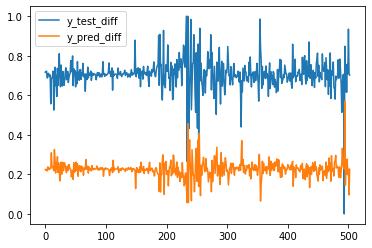

In [136]:
# R-squared is not stable. changes from 0.46to 0.94
from sklearn.metrics import r2_score
y_pred_diff = model_diffed.predict(X_test_diff)

plt.plot(y_test_diff)
plt.plot(y_pred_diff)
plt.legend(['y_test_diff', 'y_pred_diff'])
print('R-Squared: %f'%(r2_score(y_test_diff, y_pred_diff)))

In [143]:
# Hidden layers with 50 neuorons each and ReLu activation function
K.clear_session()
model_diff = Sequential()
model_diff.add(Dense(50, input_shape=(X_test_diff.shape[1], ), activation='relu', kernel_initializer='lecun_uniform'))
model_diff.add(Dense(50, input_shape=(X_test_diff.shape[1], ), activation='relu'))
model_diff.add(Dense(1))
model_diff.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

model_diff.fit(X_train_diff, y_train_diff, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
2014/2014 [==============================] - 0s 131us/step - loss: 0.0303
Epoch 2/20
2014/2014 [==============================] - 0s 83us/step - loss: 0.0022
Epoch 3/20
2014/2014 [==============================] - 0s 84us/step - loss: 0.0021
Epoch 4/20
2014/2014 [==============================] - 0s 89us/step - loss: 0.0020
Epoch 5/20
2014/2014 [==============================] - 0s 91us/step - loss: 0.0019
Epoch 6/20
2014/2014 [==============================] - 0s 82us/step - loss: 0.0018
Epoch 7/20
2014/2014 [==============================] - 0s 92us/step - loss: 0.0017
Epoch 8/20
2014/2014 [==============================] - 0s 82us/step - loss: 0.0017
Epoch 9/20
2014/2014 [==============================] - 0s 77us/step - loss: 0.0017
Epoch 10/20
2014/2014 [==============================] - 0s 74us/step - loss: 0.0017
Epoch 11/20
2014/2014 [==============================] - 0s 74us/step - loss: 0.0017
Epoch 12/20
2014/2014 [==============================] - 0s 74us/step - l

In [ ]:
# Run LSTM with 50 neurons and and relu activation function, get R2 output around -10

R-Squared: -13.950566


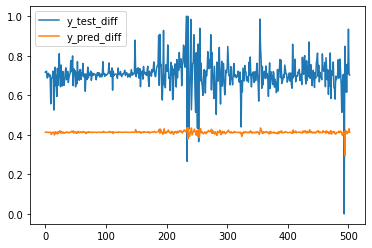

In [144]:
#Ran multi times. The R squared error is something btween 0.97 and 0.98
y_pred_diff = model_diff.predict(X_test_diff)
plt.plot(y_test_diff)
plt.plot(y_pred_diff)
plt.legend(['y_test_diff', 'y_pred_diff'])
print('R-Squared: %f'%(r2_score(y_test_diff, y_pred_diff)))